# Credit Risk Analysis

## Loading the data and other imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('loans.csv')

In [3]:
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"


Column Description
* loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
* term : The number of payments on the loan. Values are in months and can be either 36 or 60.
* int_rate : Interest Rate on the loan
* installment : The monthly payment owed by the borrower if the loan originates.
* grade : assigned loan grade
* sub_grade : assigned loan subgrade
* emp_title :The job title supplied by the Borrower when applying for the loan.*
* emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.
* annual_inc : The self-reported annual income provided by the borrower during registration.
* verification_status : Indicates if income was verified by , not verified, or if the income source was verified
* issue_d : The month which the loan was funded
* loan_status : Current status of the loan - Target Variable
* purpose : A category provided by the borrower for the loan request.
* title : The loan title provided by the borrower
* dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested loan, divided by the borrower’s self-reported monthly income.
* earliest_cr_line :The month the borrower's earliest reported credit line was opened
* revol_bal : Total credit revolving balance
* revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit. initial_list_status : The initial listing status of the loan. Possible values are – W, F
* application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
* mort_acc : Number of mortgage accounts.
* pub_rec_bankruptcies : Number of public record Lending Clubs/Banksruptcies
* pub_rec : Number of derogatory public records
* open_acc : The number of open credit lines in the borrower's credit file.
* total_acc : The total number of credit lines currently in the borrower's credit file
* Address- Address of the borrower

<h2>Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [5]:
df.select_dtypes(include=['object']).columns.tolist()

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'title',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

In [6]:
#Numeric Columns
df.select_dtypes(include=['float64']).columns.tolist()

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies']

<AxesSubplot: xlabel='loan_status', ylabel='count'>

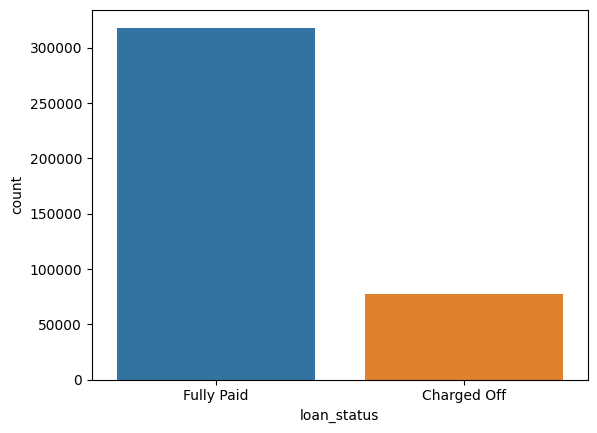

In [7]:
#To understand class imbalance
sns.countplot(x='loan_status',data=df)

In [8]:
corr = df.corr()
corr

C:\Users\aditi\AppData\Local\Temp\ipykernel_31988\2438084875.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot: >

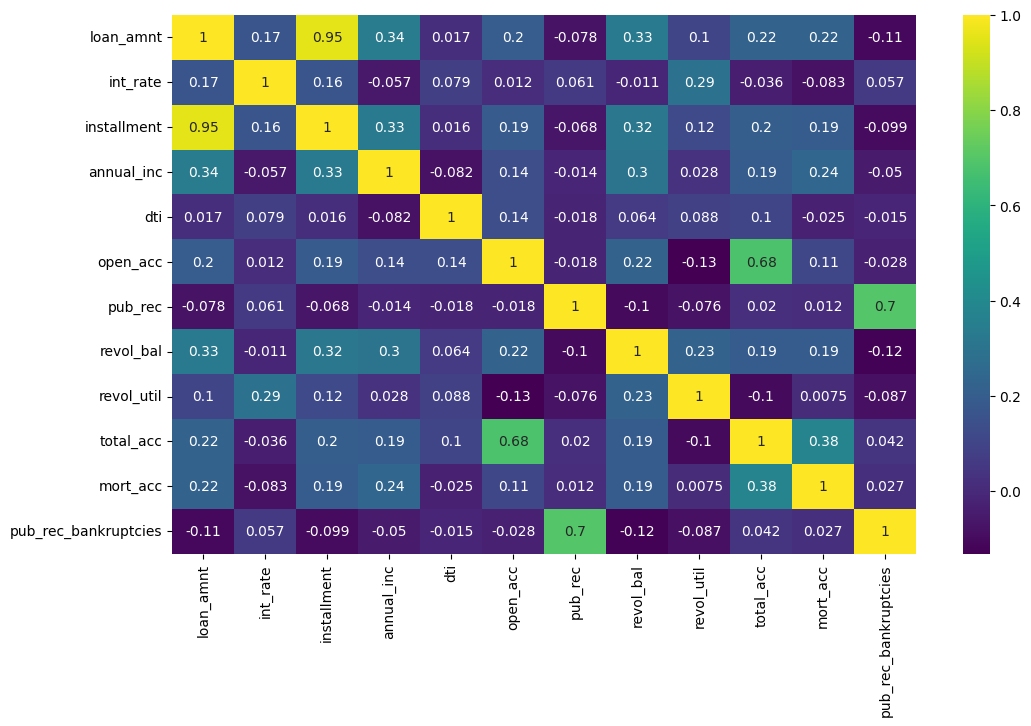

In [9]:
plt.figure(figsize=(12,7))
sns.heatmap(corr,annot=True,cmap='viridis')

<AxesSubplot: xlabel='installment', ylabel='loan_amnt'>

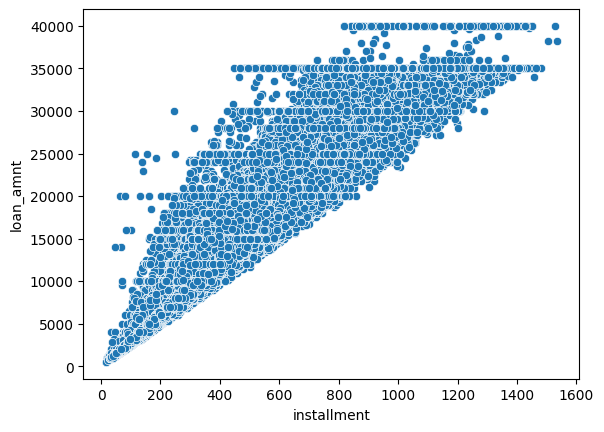

In [10]:
sns.scatterplot(x='installment',y='loan_amnt',data=df)

Very high correlation of installment and loan amount. 
-> Duplicate information here

<Figure size 1600x1600 with 0 Axes>

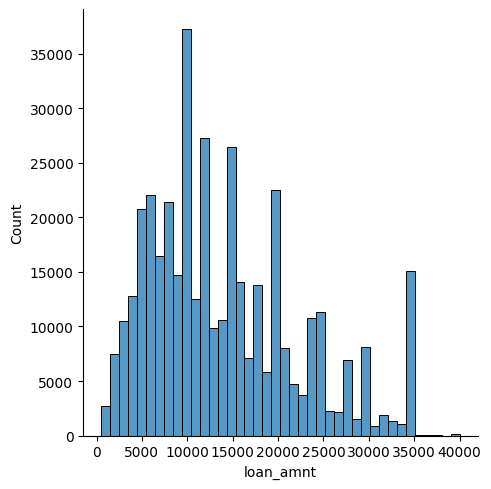

In [11]:
plt.figure(figsize=(16,16))
sns.displot(df['loan_amnt'],kde=False,bins=40)

<AxesSubplot: xlabel='loan_status', ylabel='loan_amnt'>

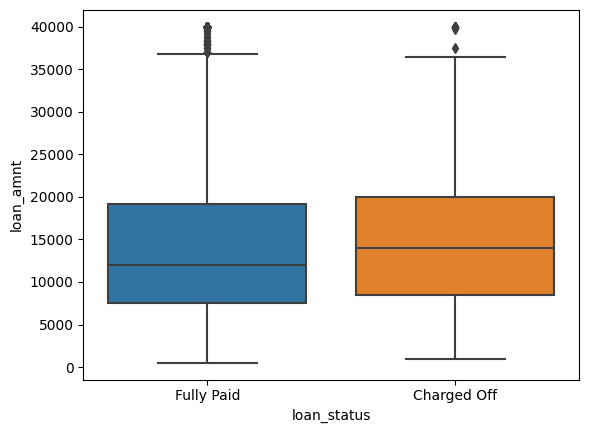

In [12]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

<AxesSubplot: xlabel='loan_status', ylabel='installment'>

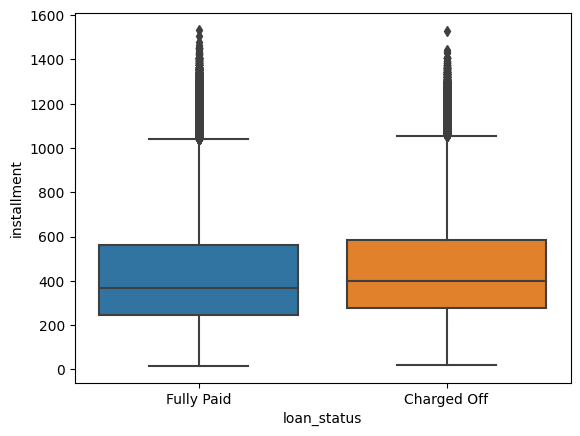

In [13]:
sns.boxplot(x='loan_status',y='installment',data=df)

<AxesSubplot: xlabel='loan_status', ylabel='loan_amnt'>

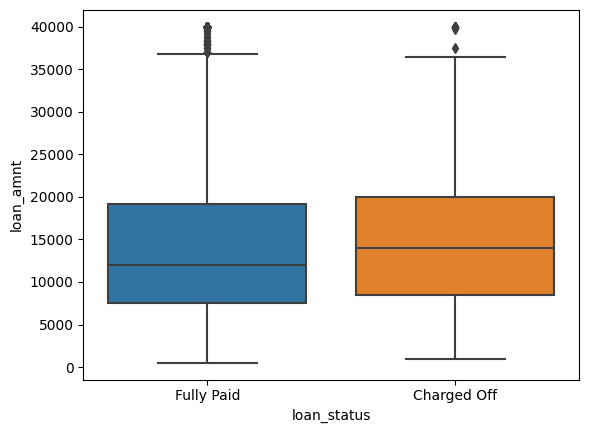

In [14]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df)

<Figure size 800x400 with 0 Axes>

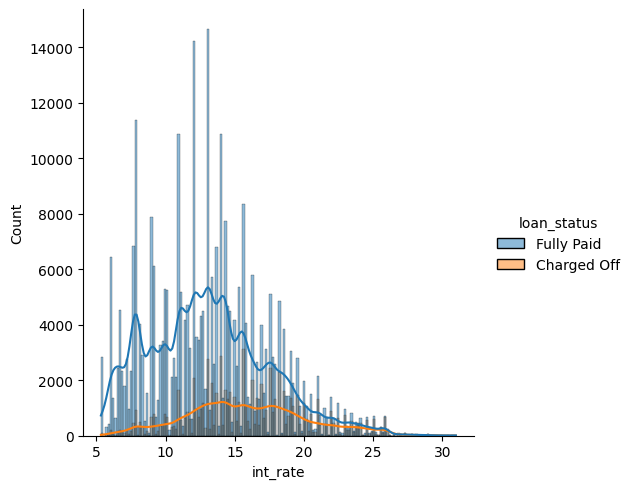

In [15]:
plt.figure(figsize = (8,4))
sns.displot(data = df, x = 'int_rate' , hue = 'loan_status', kde = True)
plt.show()

Summary for the loan amount, grouped by the loan status

In [16]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [17]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [18]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

<AxesSubplot: xlabel='grade', ylabel='count'>

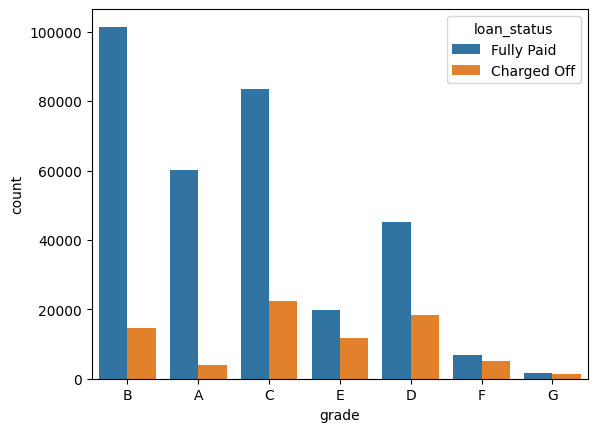

In [19]:
sns.countplot(x='grade',data=df,hue='loan_status')

<AxesSubplot: xlabel='sub_grade', ylabel='count'>

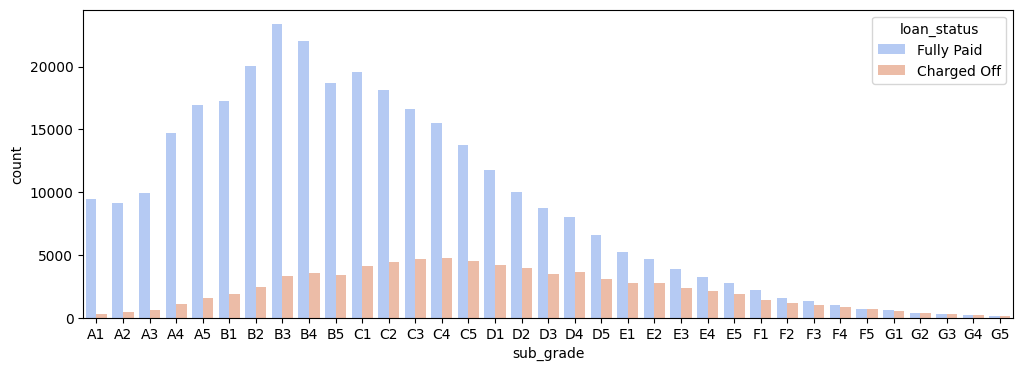

In [20]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' ,hue='loan_status')

<AxesSubplot: xlabel='sub_grade', ylabel='count'>

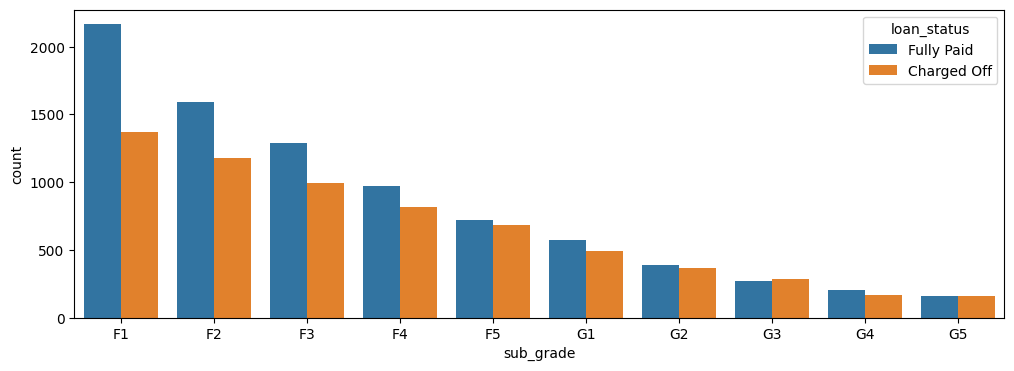

In [21]:
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order = subgrade_order,hue='loan_status')

In [22]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [23]:
df['target_feature'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [24]:
df[['target_feature','loan_status']]

,target_feature,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


 Data PreProcessing




In [25]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,target_feature
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0


Missing Data

In [26]:
len(df)

396030

In [27]:
# Missing values count
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
target_feature              0
dtype: int64

In [28]:
#Missing values in %
df.isnull().sum()*100/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
target_feature          0.000000
dtype: float64

In [29]:
df['emp_title'].nunique()

173105

In [30]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [31]:
#Drop emp_title - too many unique values 
df = df.drop('emp_title',axis=1)

In [32]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [33]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

<AxesSubplot: xlabel='emp_length', ylabel='count'>

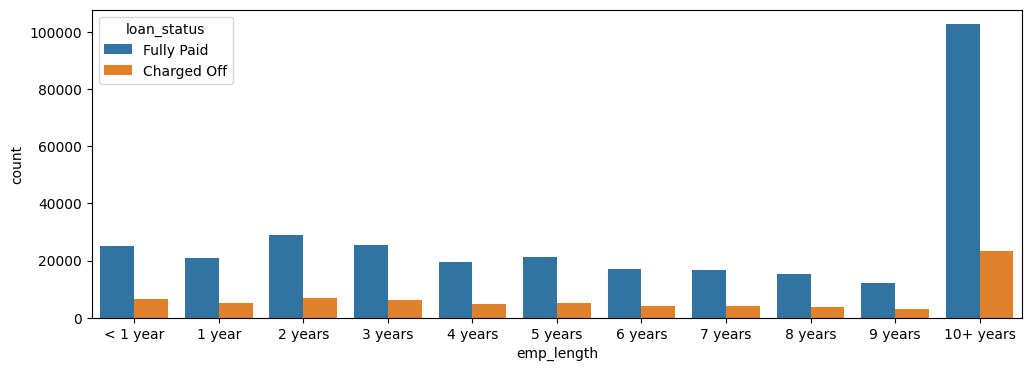

In [34]:
plt.figure(figsize=(12,4))
sns.countplot(x = 'emp_length',data = df, hue = 'loan_status', order = emp_length_order)

<AxesSubplot: xlabel='emp_length', ylabel='count'>

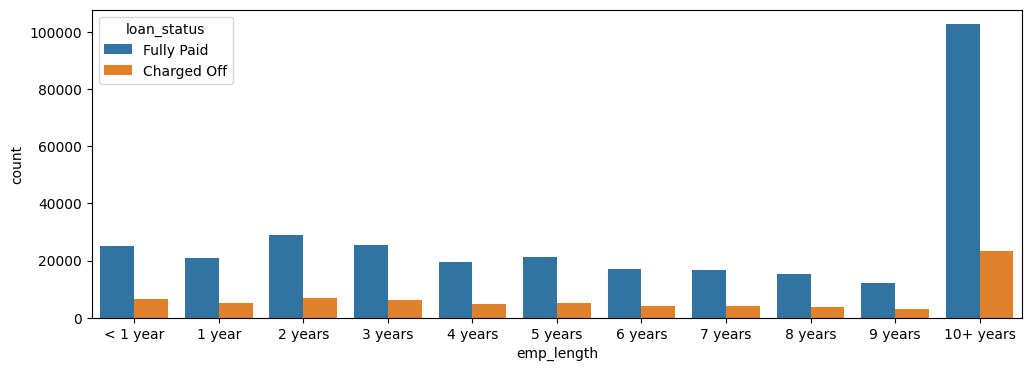

In [35]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_status')

In [36]:
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']
emp_co

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
5 years       5092
6 years       3943
7 years       4055
8 years       3829
9 years       3070
< 1 year      6563
Name: loan_status, dtype: int64

In [37]:
emp_fp = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

In [38]:
emp_len = emp_co/emp_fp

In [39]:
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

<AxesSubplot: xlabel='emp_length'>

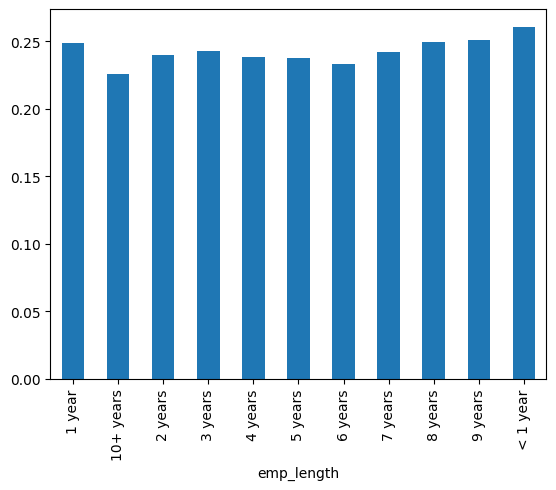

In [40]:
emp_len.plot(kind='bar')

In [41]:
df = df.drop('emp_length',axis=1)

In [42]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
target_feature              0
dtype: int64

In [43]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [44]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [45]:
df = df.drop('title',axis=1)

In [46]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [47]:
print("Correlation with the mort_acc column")
df.corr()['mort_acc'].sort_values()

Correlation with the mort_acc column


C:\Users\aditi\AppData\Local\Temp\ipykernel_31988\3893325951.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['mort_acc'].sort_values()


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
target_feature          0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below

In [48]:
print("Mean of mort_acc column per total_acc")
df.groupby('total_acc').mean()['mort_acc']

Mean of mort_acc column per total_acc


C:\Users\aditi\AppData\Local\Temp\ipykernel_31988\169858596.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('total_acc').mean()['mort_acc']


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [49]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

C:\Users\aditi\AppData\Local\Temp\ipykernel_31988\1700171341.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_acc_avg = df.groupby('total_acc').mean()['mort_acc']


In [50]:
total_acc_avg[2.0]

0.0

In [51]:
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [52]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [53]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
target_feature            0
dtype: int64

In [54]:
df = df.dropna()

In [55]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
target_feature          0
dtype: int64

In [56]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [57]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [58]:
# Or just use .map()
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [59]:
df = df.drop('grade',axis=1)

In [60]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [61]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [62]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'target_feature', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [63]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

Convert the columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables

In [64]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [65]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

<AxesSubplot: xlabel='home_ownership', ylabel='count'>

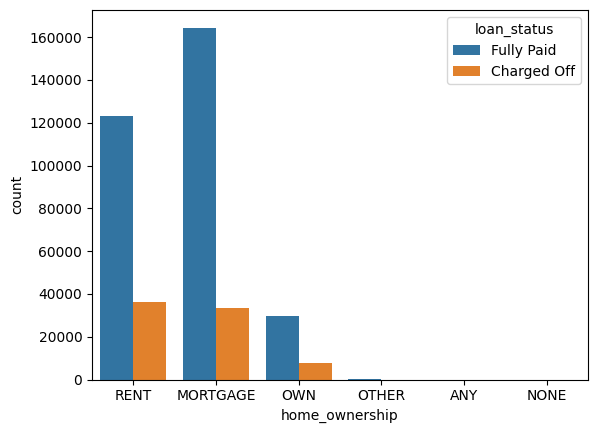

In [66]:
sns.countplot(x='home_ownership',data=df,hue='loan_status')

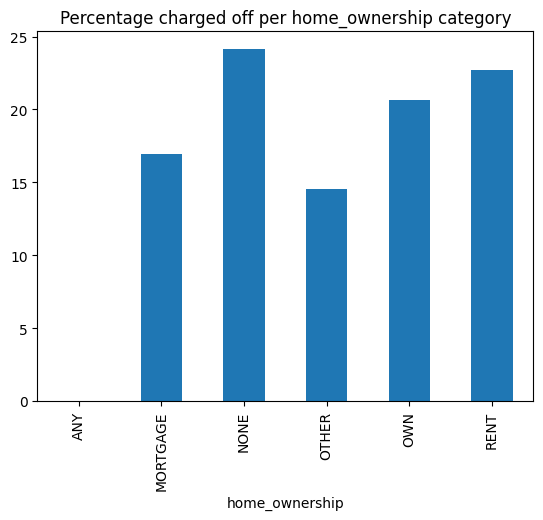

In [67]:
charged_off = df[df['loan_status']=="Charged Off"].groupby("home_ownership").count()['loan_status']
fully_paid = df[df['loan_status']=="Fully Paid"].groupby("home_ownership").count()['loan_status']
percentage_charged_off = (charged_off * 100)/(charged_off + fully_paid)
percentage_charged_off.plot(kind='bar')
plt.title("Percentage charged off per home_ownership category");

In [68]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

In [69]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [70]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [71]:
df['issue_d']

0         Jan-2015
1         Jan-2015
2         Jan-2015
3         Nov-2014
4         Apr-2013
            ...   
396025    Oct-2015
396026    Feb-2015
396027    Oct-2013
396028    Aug-2012
396029    Jun-2010
Name: issue_d, Length: 395219, dtype: object

In [72]:
#issue_d : Its a Time series data and is not required in our analysis. So we can drop this field
df = df.drop('issue_d',axis=1)

In [73]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [74]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [75]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'target_feature', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT', '05113',
       '11650', '

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 80 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   annual_inc                           395219 non-null  float64
 5   loan_status                          395219 non-null  object 
 6   dti                                  395219 non-null  float64
 7   open_acc                             395219 non-null  float64
 8   pub_rec                              395219 non-null  float64
 9   revol_bal                            395219 non-null  float64
 10  revol_util                           395219 non-null  float64
 11  total_acc    

In [77]:
df.shape

(395219, 80)

## Train Test Split

**Import train_test_split from sklearn.**

In [100]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [101]:
train, test = train_test_split(df, test_size=0.33, random_state=42)

In [102]:
train['annual_inc']

43729      40000.0
300769    120000.0
132630     50000.0
114106    225000.0
241171     70000.0
            ...   
259721     70000.0
366594     62500.0
132193     66000.0
147164     44000.0
122200     98400.0
Name: annual_inc, Length: 264796, dtype: float64

AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)


<AxesSubplot: xlabel='total_acc'>

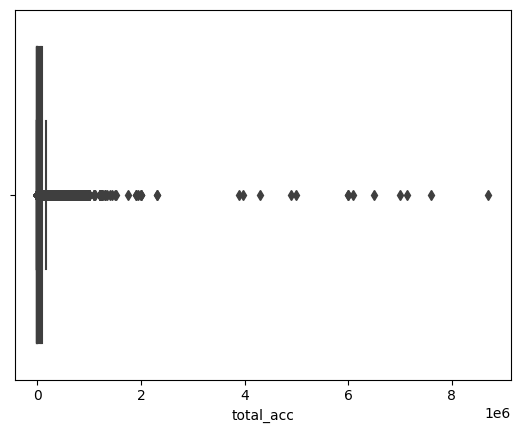

In [104]:
sns.boxplot(x=train['annual_inc'])
sns.boxplot(x=train['dti'])
sns.boxplot(x=train['open_acc'])
sns.boxplot(x=train['revol_bal'])
sns.boxplot(x=train['revol_util'])
sns.boxplot(x=train['total_acc'])

In [105]:
print(train.shape)
train = train[train['annual_inc'] <= 250000]
train = train[train['dti'] <= 50]
train = train[train['open_acc'] <= 40]
train = train[train['total_acc'] <= 80]
train = train[train['revol_util'] <= 120]
train = train[train['revol_bal'] <= 250000]
print(train.shape)

(264796, 80)
(262143, 80)


In [88]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, auc,
     ConfusionMatrixDisplay, RocCurveDisplay
)

In [112]:
X = df.drop(columns=['loan_status','target_feature'])
y = pd.DataFrame(df['target_feature'],columns=['target_feature'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (395219, 78)
Shape of y: (395219, 1)


In [90]:
# Check the balance of our target values
y['target_feature'].value_counts()

1    317696
0     77523
Name: target_feature, dtype: int64

In [91]:
X.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
0,10000.0,36,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,...,0,0,1,0,0,0,0,0,0,1990
1,8000.0,36,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,...,1,0,0,0,0,0,0,0,0,2004
2,15600.0,36,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,...,1,0,0,0,0,0,0,0,0,2007
3,7200.0,36,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,...,0,0,0,0,0,0,0,0,0,2006
4,24375.0,60,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,...,0,1,0,0,0,0,0,0,0,1999


In [92]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
# #random state here allows reproducibility of data. test size means we are reserving 30% of randomized data for testing purposes
# #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [93]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [94]:
print(X_train.shape)
print(X_test.shape)

(276653, 78)
(118566, 78)


In [95]:
def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

<b>Logistic Regression WITHOUT ADAYSN

In [124]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the partition size ratios for each rotation
partition_ratios = [(0.6, 0.4), (0.7, 0.3), (0.8, 0.2), (0.9, 0.1)]

# Initialize an empty list to store accuracy scores
accuracy_scores = []

C:\Users\aditi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Rotation 60.0-40.0 | Accuracy: 0.80


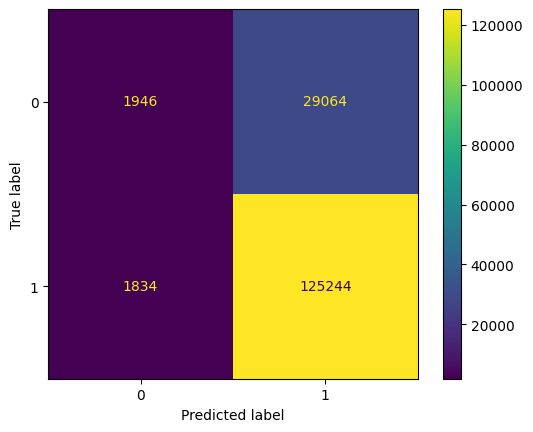

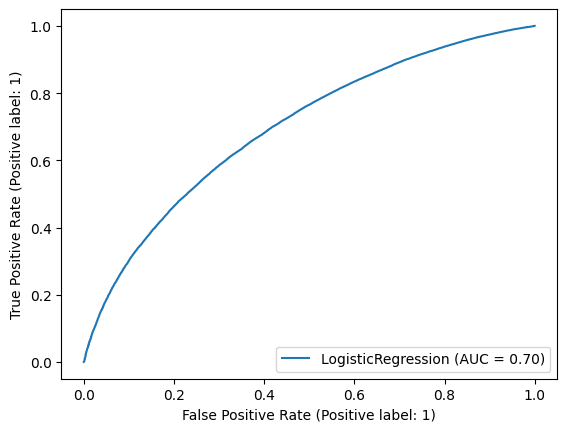

C:\Users\aditi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Rotation 70.0-30.0 | Accuracy: 0.81


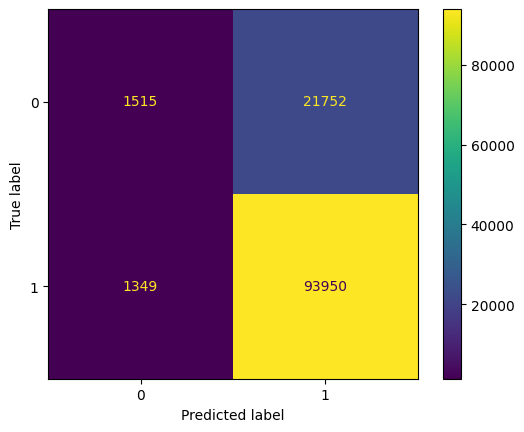

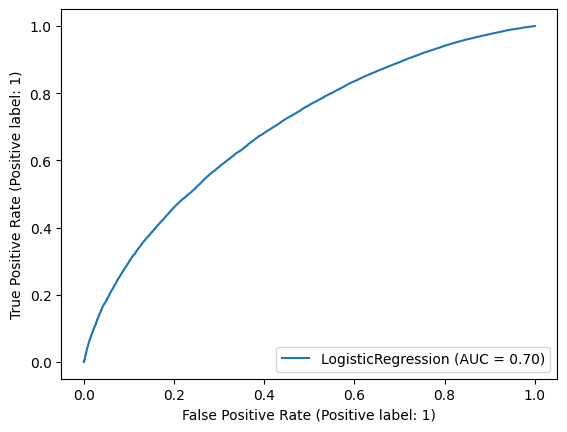

C:\Users\aditi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Rotation 80.0-20.0 | Accuracy: 0.80


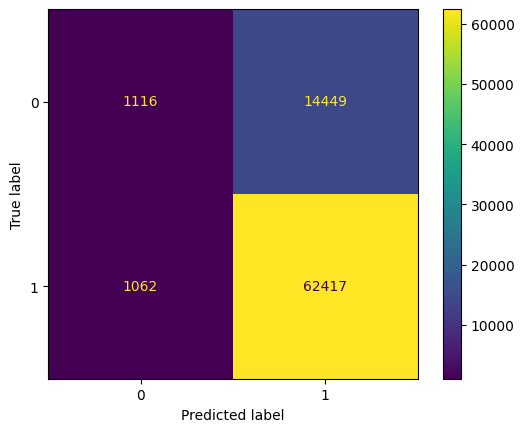

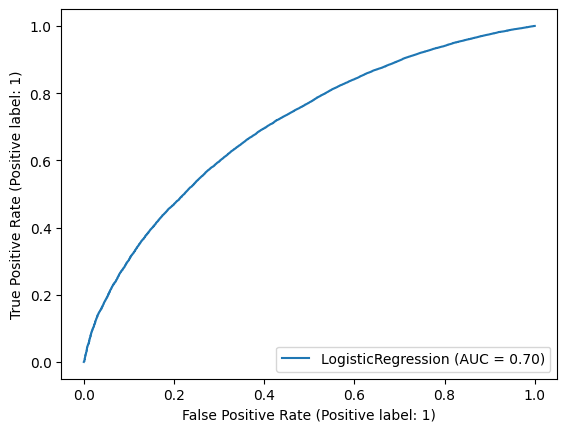

C:\Users\aditi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Rotation 90.0-10.0 | Accuracy: 0.80


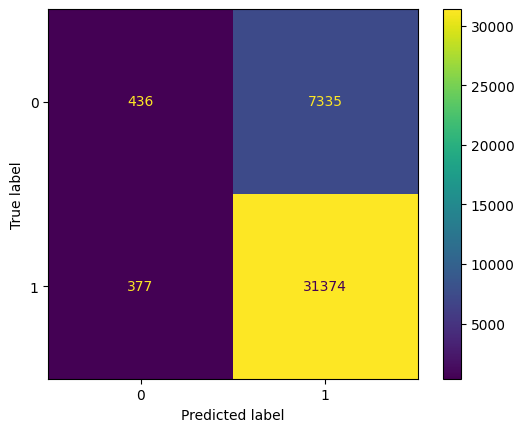

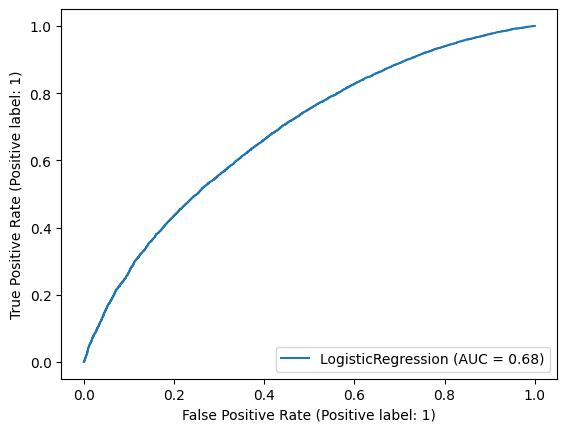

Average Accuracy: 0.8045877401615978


In [125]:
# Rotate through the data and train models with different partition sizes
for train_ratio, test_ratio in partition_ratios:
    # Split the data into training and testing sets for this rotation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, train_size=train_ratio)

    # Initialize and train a model
    logmodel = LogisticRegression(solver='lbfgs', penalty='l2', C=0.001, max_iter=1000)
    logmodel.fit(X_train, y_train)

    # Make predictions on the test set
#     train_accuracy = logmodel.score(X_train, y_train)
#     test_accuracy = logmodel.score(X_test, y_test)
    predictions = logmodel.predict(X_test)

    # Calculate accuracy for this rotation
    accuracy = accuracy_score(y_test, predictions)
    accuracy_scores.append(accuracy)

    #Display accuracy
    print(f"Rotation {train_ratio * 100}-{test_ratio * 100} | Accuracy: {accuracy:.2f}")
    
    # Display confusion matrix
    cm = confusion_matrix(y_test, predictions, labels=logmodel.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logmodel.classes_)
    disp.plot()
    plt.show()

    # Display ROC curve
    fpr, tpr, _ = roc_curve(y_test, logmodel.predict_proba(X_test)[:, 1])
    RocCurveDisplay.from_estimator(logmodel, X_test, y_test)
    plt.show()

# Calculate the average accuracy across rotations
average_accuracy = np.mean(accuracy_scores)
print("Average Accuracy:", average_accuracy)


In [127]:
scores_dict = {
    'Logistic Regression': {
        'Train': roc_auc_score(y_train, logmodel.predict(X_train)),
        'Test': roc_auc_score(y_test, logmodel.predict(X_test)),
    },
}


<b>Logistic Regression WITH ADAYSN

C:\Users\aditi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Rotation 60.0-40.0 | Accuracy: 0.81


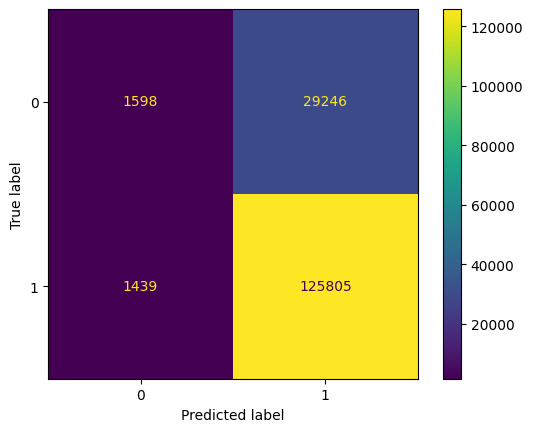

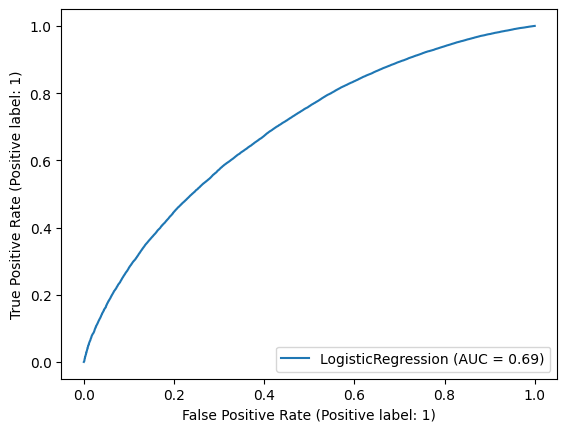

C:\Users\aditi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Rotation 70.0-30.0 | Accuracy: 0.81


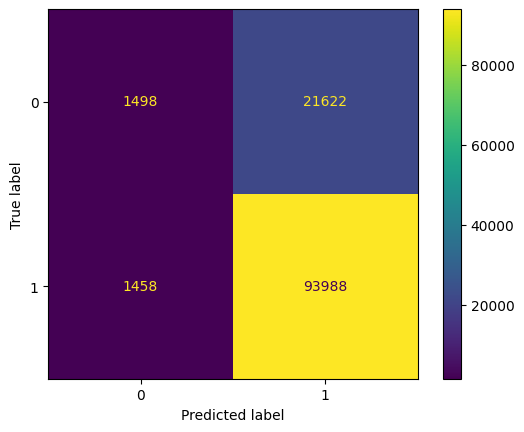

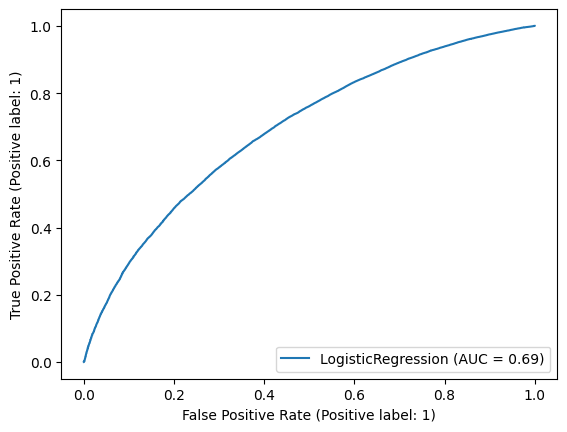

C:\Users\aditi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Rotation 80.0-20.0 | Accuracy: 0.80


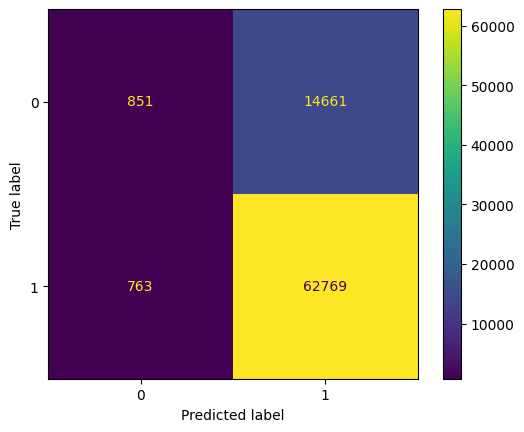

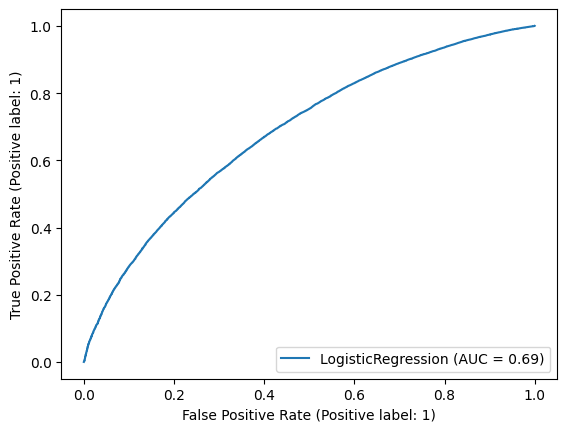

C:\Users\aditi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Rotation 90.0-10.0 | Accuracy: 0.81


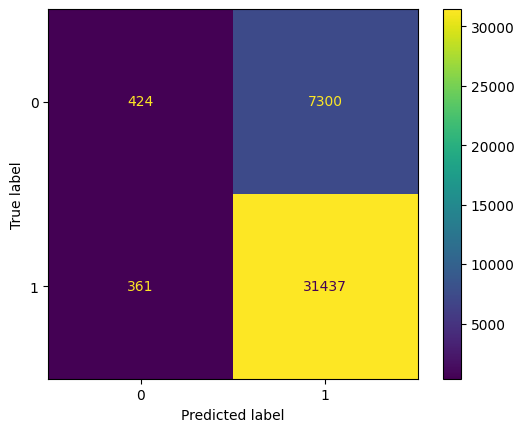

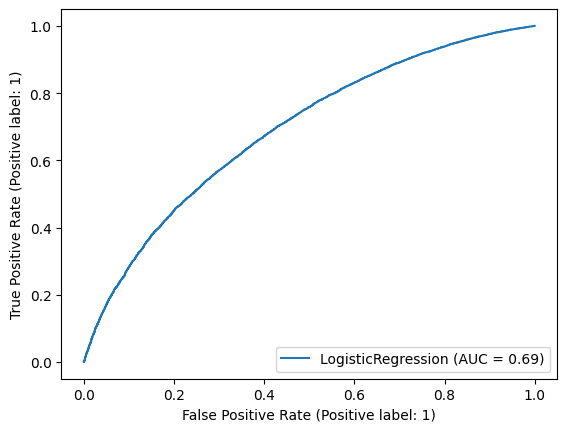

Average Accuracy: 0.8050771827505355


In [128]:
# Rotate through the data and train models with different partition sizes
for train_ratio, test_ratio in partition_ratios:
    # Split the data into training and testing sets for this rotation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, train_size=train_ratio)

    # Apply ADASYN to oversample the minority class in the training set
    ada = ADASYN(random_state=130)
    X_train_resampled, y_train_resampled = ada.fit_resample(X_train, y_train)

    # Initialize and train a model
    ada_logmodel = LogisticRegression(solver='lbfgs', penalty='l2', C=0.001, max_iter=1000)
    ada_logmodel.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = ada_logmodel.predict(X_test)

    # Calculate accuracy for this rotation
    accuracy = accuracy_score(y_test, predictions)
    accuracy_scores.append(accuracy)

    # Display accuracy
    print(f"Rotation {train_ratio * 100}-{test_ratio * 100} | Accuracy: {accuracy:.2f}")
    
    # Display confusion matrix
    cm = confusion_matrix(y_test, predictions, labels=ada_logmodel.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ada_logmodel.classes_)
    disp.plot()
    plt.show()

    # Display ROC curve
    fpr, tpr, _ = roc_curve(y_test, ada_logmodel.predict_proba(X_test)[:, 1])
    RocCurveDisplay.from_estimator(ada_logmodel, X_test, y_test)
    plt.show()

# Calculate the average accuracy across rotations
average_accuracy = np.mean(accuracy_scores)
print("Average Accuracy:", average_accuracy)


<b>XGBoost WITHOUT ADAYSN

In [129]:
# Define the partition size ratios for each rotation
partition_ratios = [(0.6, 0.4), (0.7, 0.3), (0.8, 0.2), (0.9, 0.1)]

# Initialize an empty list to store accuracy scores
accuracy_scores = []

              precision    recall  f1-score   support

 Charged Off       0.91      0.48      0.63     31098
  Fully Paid       0.89      0.99      0.93    126990

    accuracy                           0.89    158088
   macro avg       0.90      0.73      0.78    158088
weighted avg       0.89      0.89      0.87    158088



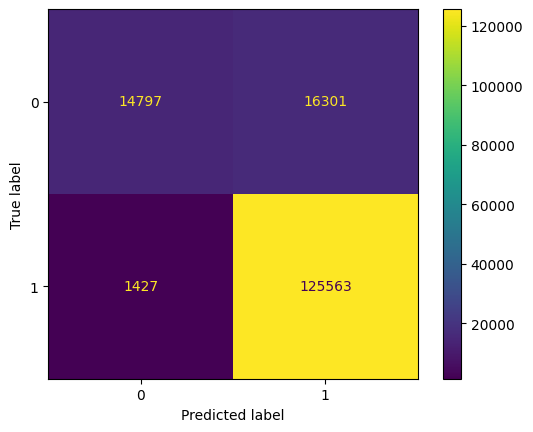

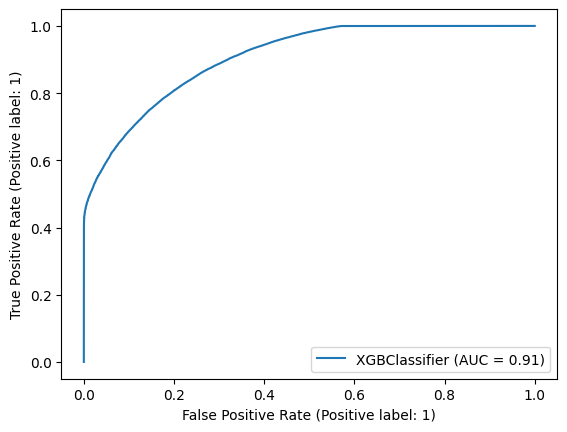

              precision    recall  f1-score   support

 Charged Off       0.92      0.47      0.62     23257
  Fully Paid       0.88      0.99      0.93     95309

    accuracy                           0.89    118566
   macro avg       0.90      0.73      0.78    118566
weighted avg       0.89      0.89      0.87    118566



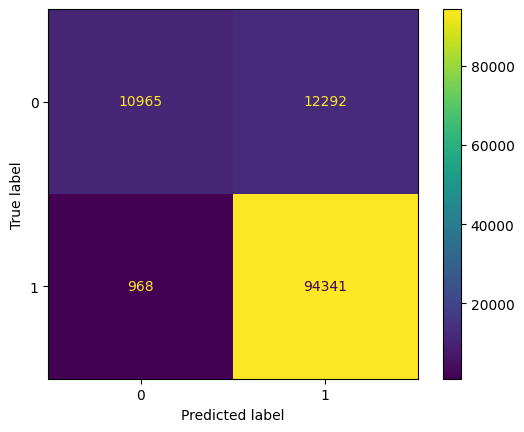

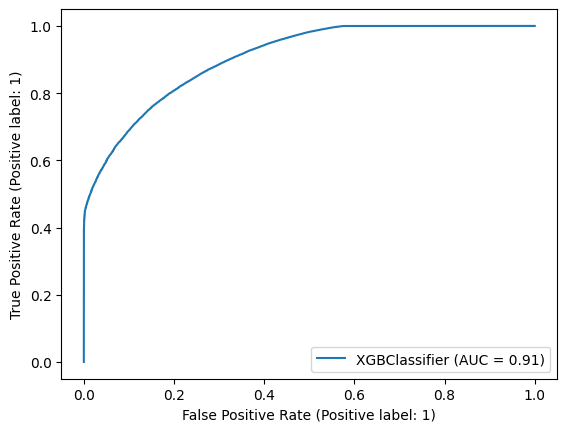

              precision    recall  f1-score   support

 Charged Off       0.91      0.48      0.63     15557
  Fully Paid       0.89      0.99      0.93     63487

    accuracy                           0.89     79044
   macro avg       0.90      0.74      0.78     79044
weighted avg       0.89      0.89      0.87     79044



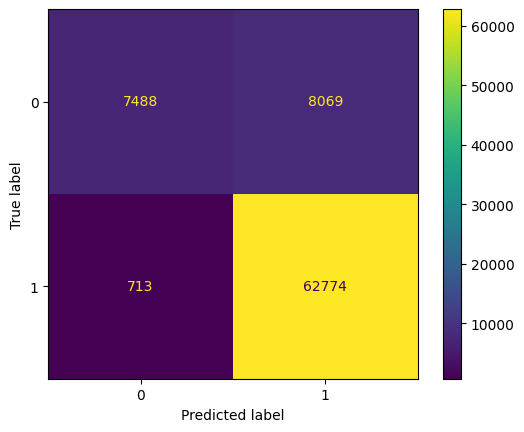

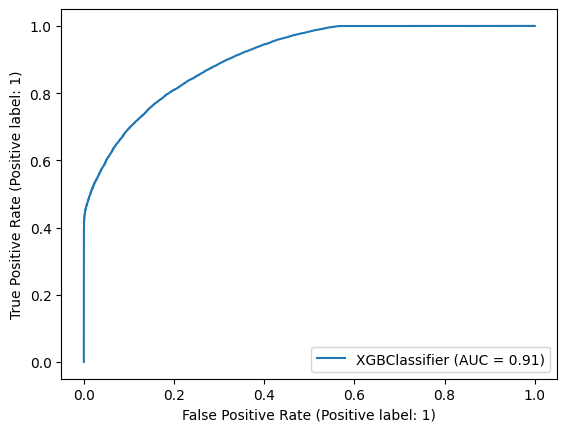

              precision    recall  f1-score   support

 Charged Off       0.92      0.48      0.63      7756
  Fully Paid       0.89      0.99      0.94     31766

    accuracy                           0.89     39522
   macro avg       0.90      0.73      0.78     39522
weighted avg       0.89      0.89      0.88     39522



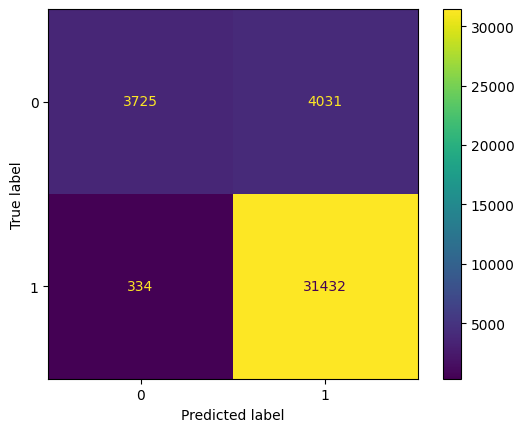

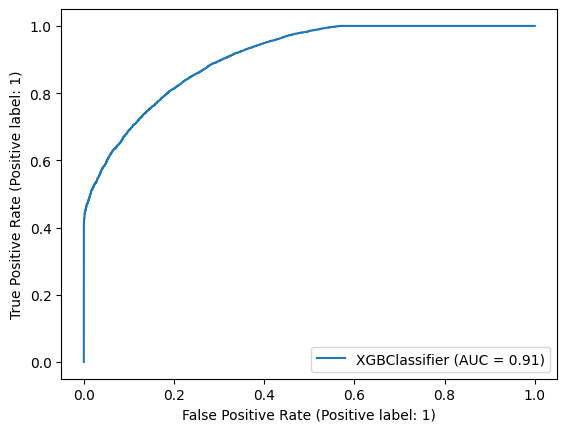

Average Accuracy: 0.8886189970143211


In [130]:
xgb_clf = XGBClassifier(objective='binary:logistic', eval_metric='error', verbosity=0)#,use_label_encoder=False)

# Rotate through the data and train models with different partition sizes
for train_ratio, test_ratio in partition_ratios:
    
    # Split the data into training and testing sets for this rotation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, train_size=train_ratio)

    # Initialize and train a model
    xgb_clf.fit(X_train, y_train)    
    
    # Make predictions on the test set
    predictions = xgb_clf.predict(X_test)
    
    # Calculate accuracy for this rotation
    accuracy = accuracy_score(y_test, predictions)
    accuracy_scores.append(accuracy)

    #Display accuracy
    print(classification_report(y_test,predictions,target_names=['Charged Off','Fully Paid']))
    
    # Display confusion matrix
    cm = confusion_matrix(y_test, predictions, labels=xgb_clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_clf.classes_)
    disp.plot()
    plt.show()

    # Display ROC curve
    fpr, tpr, _ = roc_curve(y_test, xgb_clf.predict_proba(X_test)[:, 1])
    RocCurveDisplay.from_estimator(xgb_clf, X_test, y_test)
    plt.show()

# Calculate the average accuracy across rotations
average_accuracy = np.mean(accuracy_scores)
print("Average Accuracy:", average_accuracy)

<b>XGBoost WITH ADAYSN

Rotation 60.0-40.0 | Accuracy: 0.88


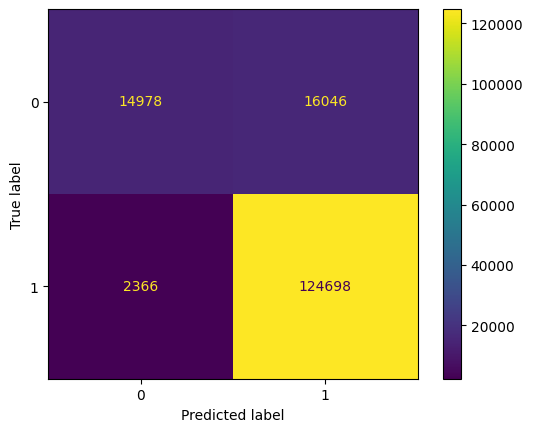

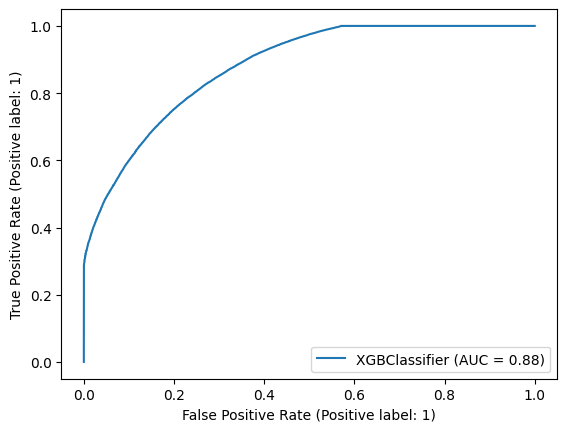

Rotation 70.0-30.0 | Accuracy: 0.88


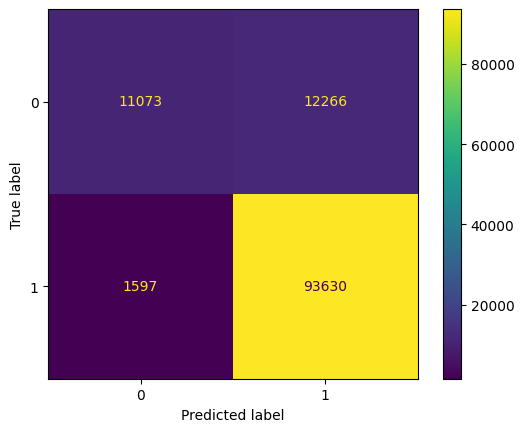

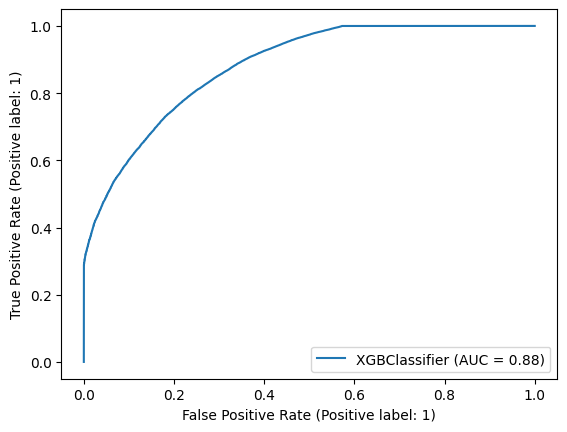

Rotation 80.0-20.0 | Accuracy: 0.89


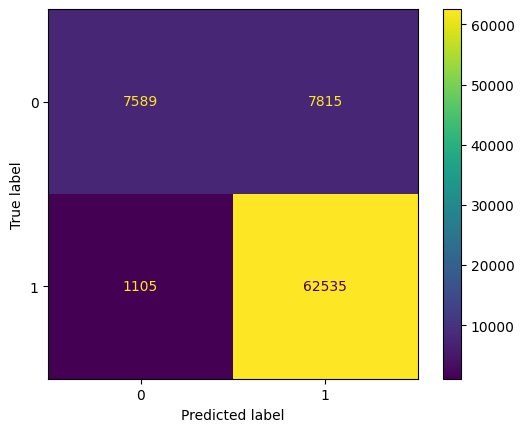

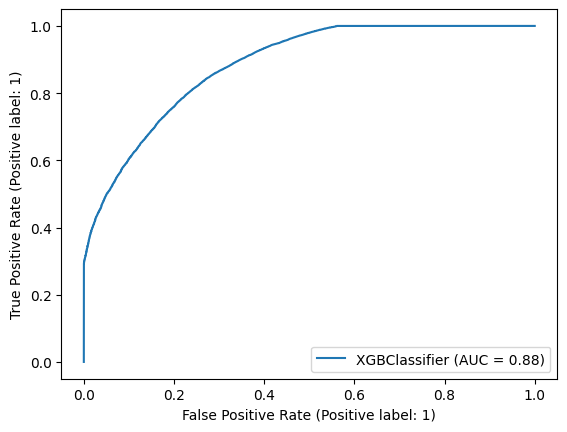

Rotation 90.0-10.0 | Accuracy: 0.88


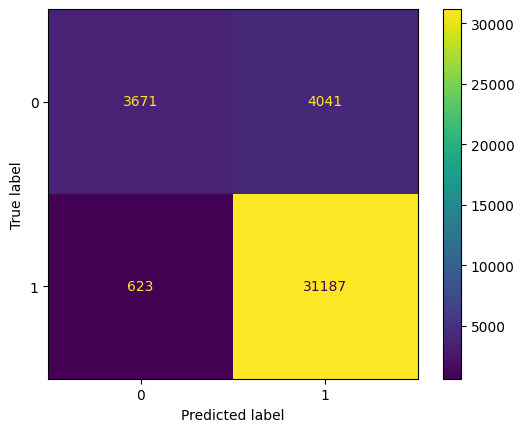

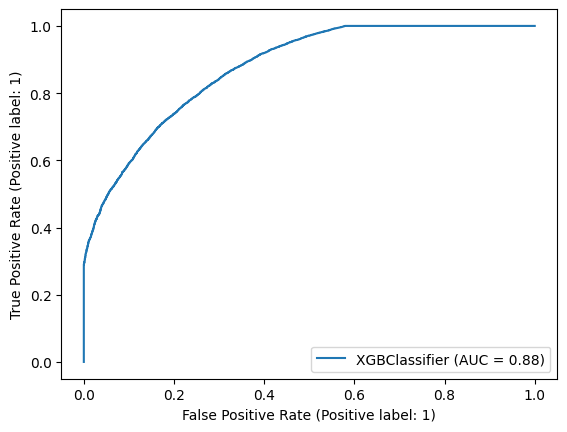

Average Accuracy: 0.8862785284145539


In [131]:
# Rotate through the data and train models with different partition sizes
for train_ratio, test_ratio in partition_ratios:
    # Split the data into training and testing sets for this rotation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, train_size=train_ratio)

    # Apply ADASYN to oversample the minority class in the training set
    ada = ADASYN(random_state=130)
    X_train_resampled, y_train_resampled = ada.fit_resample(X_train, y_train)

    # Initialize and train a model
    xgb_clf = XGBClassifier(objective='binary:logistic', eval_metric='error', verbosity=0)
    xgb_clf.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the test set
    predictions = xgb_clf.predict(X_test)

    # Calculate accuracy for this rotation
    accuracy = accuracy_score(y_test, predictions)
    accuracy_scores.append(accuracy)

    # Display accuracy
    print(f"Rotation {train_ratio * 100}-{test_ratio * 100} | Accuracy: {accuracy:.2f}")
    
    # Display confusion matrix
    cm = confusion_matrix(y_test, predictions, labels=xgb_clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_clf.classes_)
    disp.plot()
    plt.show()

    # Display ROC curve
    fpr, tpr, _ = roc_curve(y_test, xgb_clf.predict_proba(X_test)[:, 1])
    RocCurveDisplay.from_estimator(xgb_clf, X_test, y_test)
    plt.show()
    
# Calculate the average accuracy across rotations
average_accuracy = np.mean(accuracy_scores)
print("Average Accuracy:", average_accuracy)

In [132]:
scores_dict['XGBoost'] = {
        'Train': roc_auc_score(y_train, xgb_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, xgb_clf.predict(X_test)),
    }

<b>Random Forest WITHOUT ADAYSN

In [134]:
# Define the partition size ratios for each rotation
partition_ratios = [(0.6, 0.4), (0.7, 0.3), (0.8, 0.2), (0.9, 0.1)]

# Initialize an empty list to store accuracy scores
accuracy_scores = []

C:\Users\aditi\AppData\Local\Temp\ipykernel_31988\2177940886.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)


Random Forest | Rotation 60.0-40.0 | Accuracy: 0.89


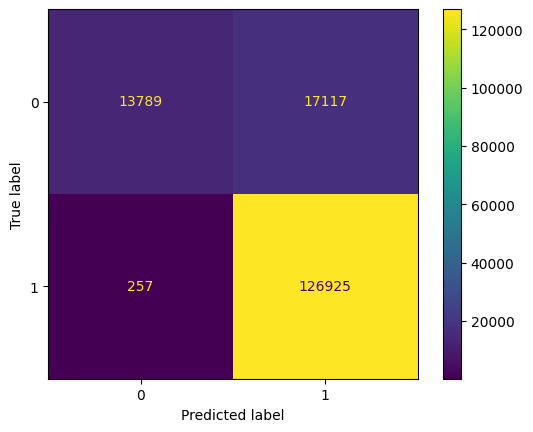

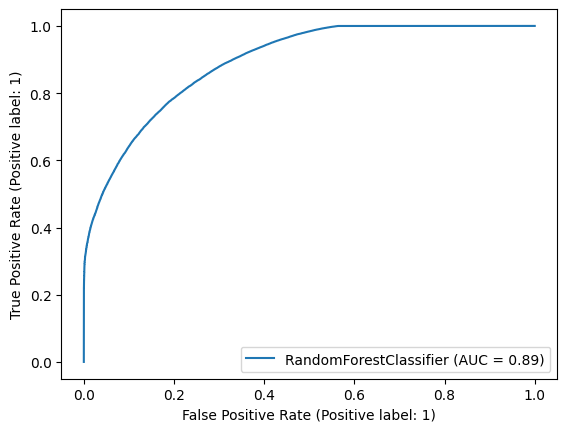

C:\Users\aditi\AppData\Local\Temp\ipykernel_31988\2177940886.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)


Random Forest | Rotation 70.0-30.0 | Accuracy: 0.89


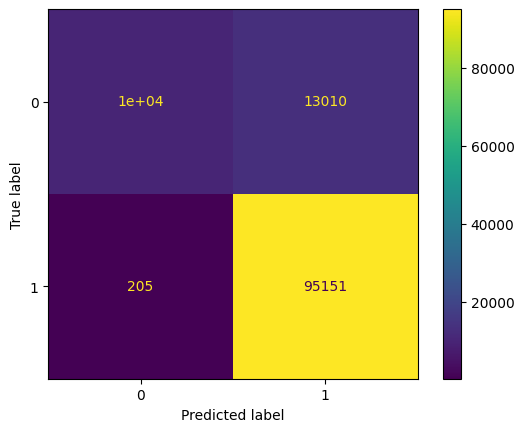

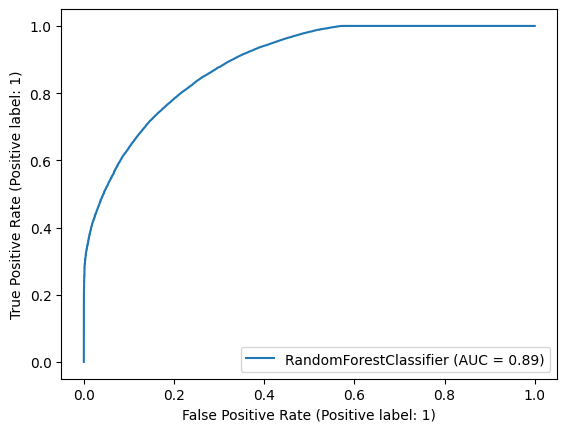

C:\Users\aditi\AppData\Local\Temp\ipykernel_31988\2177940886.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)


Random Forest | Rotation 80.0-20.0 | Accuracy: 0.89


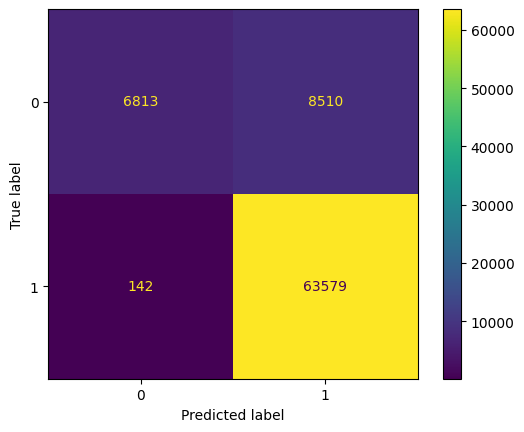

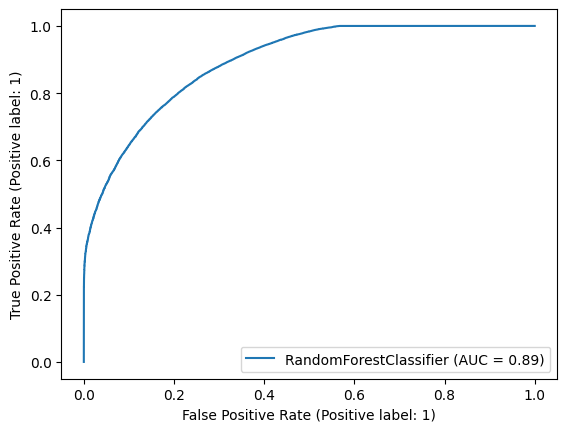

C:\Users\aditi\AppData\Local\Temp\ipykernel_31988\2177940886.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)


Random Forest | Rotation 90.0-10.0 | Accuracy: 0.89


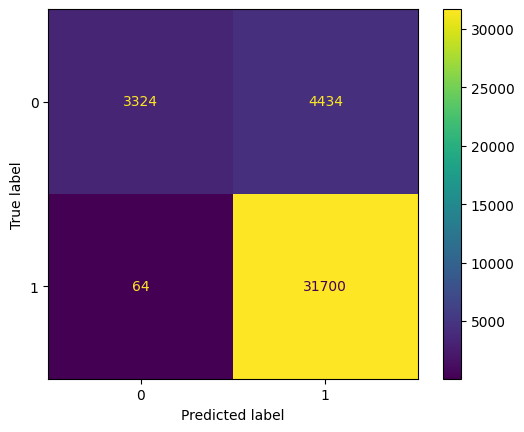

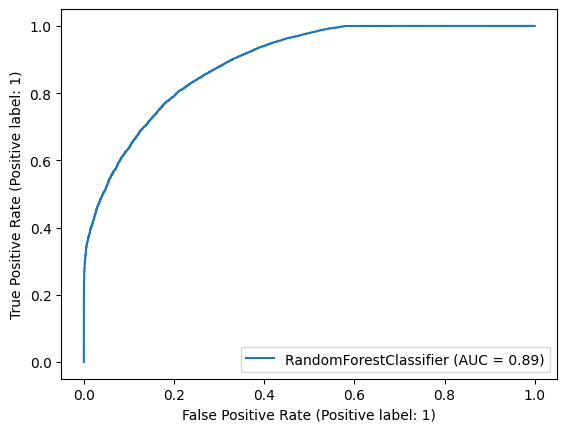

Average Random Forest Accuracy: 0.8888435554880826


In [136]:
# Rotate through the data and train models with different partition sizes
for train_ratio, test_ratio in partition_ratios:
    # Split the data into training and testing sets for this rotation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, train_size=train_ratio)

    # Initialize and train Random Forest model
    rf_clf = RandomForestClassifier(n_estimators=200, random_state=1, min_samples_leaf=5)
    rf_clf.fit(X_train, y_train)

    # Make predictions with Random Forest
    predictions = rf_clf.predict(X_test)

    # Calculate accuracy for Random Forest
    accuracy = accuracy_score(y_test, predictions)
    accuracy_scores.append(accuracy)

    # Display accuracy for Random Forest
    print(f"Random Forest | Rotation {train_ratio * 100}-{test_ratio * 100} | Accuracy: {accuracy:.2f}")

    # Display confusion matrix for Random Forest
    cm = confusion_matrix(y_test, predictions, labels=rf_clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf.classes_)
    disp.plot()
    plt.show()

    # Display ROC curve for Random Forest
    fpr, tpr, _ = roc_curve(y_test, rf_clf.predict_proba(X_test)[:, 1])
    RocCurveDisplay.from_estimator(rf_clf, X_test, y_test)
    plt.show()

# Calculate the average accuracy across rotations for Random Forest
average_rf_accuracy = np.mean(accuracy_scores)
print("Average Random Forest Accuracy:", average_rf_accuracy)


In [ ]:
scores_dict['Random Forest'] = {
        'Train': roc_auc_score(y_train, rf_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, rf_clf.predict(X_test)),
    }

<h2>Random Forest WITH ADAYSN

Rotation 60.0-40.0 | Accuracy: 0.90


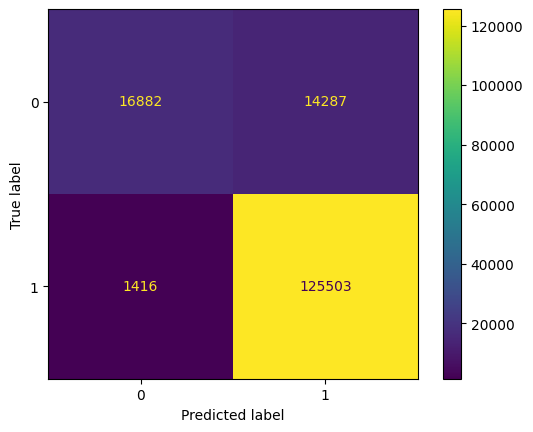

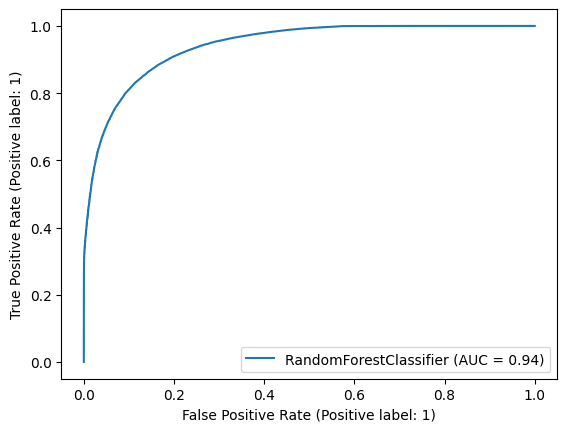

Rotation 70.0-30.0 | Accuracy: 0.90


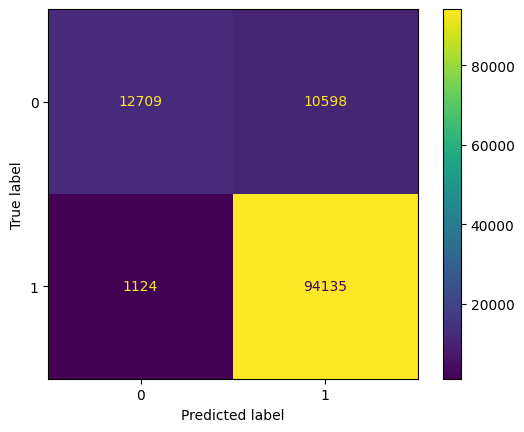

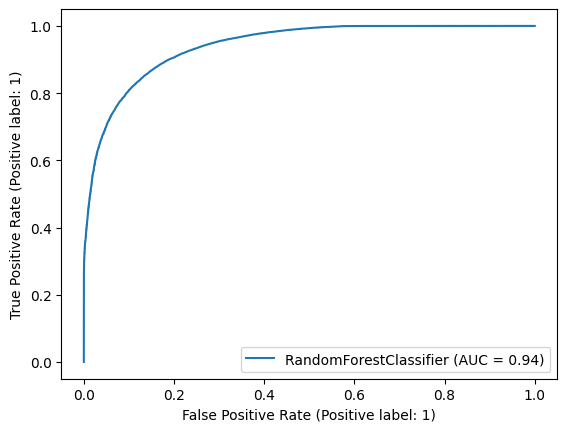

Rotation 80.0-20.0 | Accuracy: 0.90


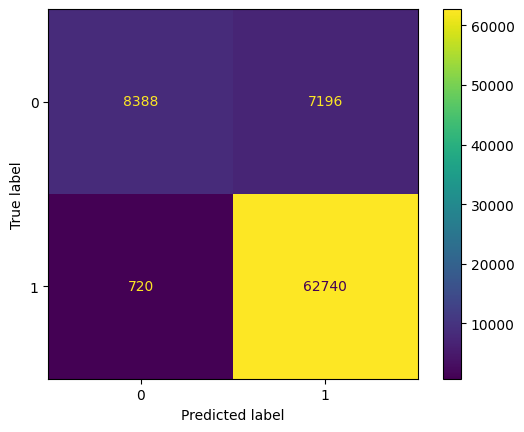

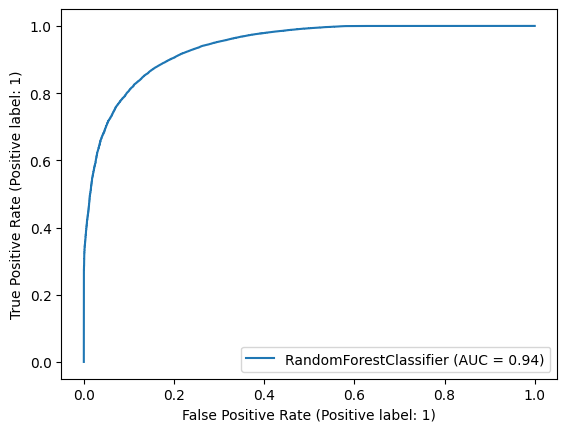

Rotation 90.0-10.0 | Accuracy: 0.90


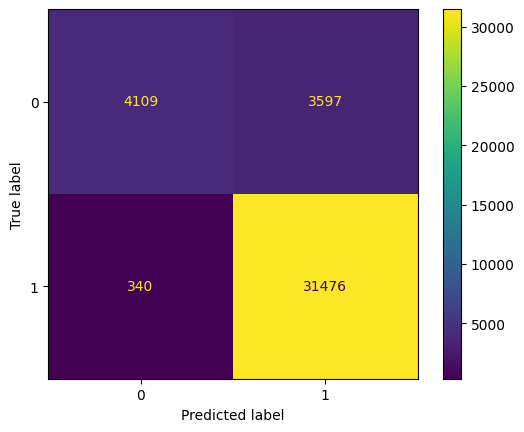

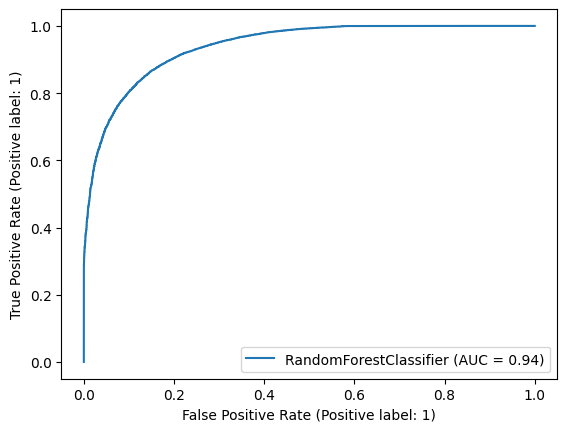

Average Accuracy: 0.8946770680464888


In [138]:
# Rotate through the data and train models with different partition sizes
for train_ratio, test_ratio in partition_ratios:
    # Split the data into training and testing sets for this rotation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, train_size=train_ratio)

    # Apply ADASYN to oversample the minority class in the training set
    ada = ADASYN(random_state=130)
    X_train_resampled, y_train_resampled = ada.fit_resample(X_train, y_train)

    # Initialize and train a model
    adasyn_rf = RandomForestClassifier(n_estimators=100, random_state=1, min_samples_leaf=5)
    adasyn_rf.fit(X_train_ada, y_train_ada)

    # Make predictions on the test set
    predictions = adasyn_rf.predict(X_test)

    # Calculate accuracy for this rotation
    accuracy = accuracy_score(y_test, predictions)
    accuracy_scores.append(accuracy)

    # Display accuracy
    print(f"Rotation {train_ratio * 100}-{test_ratio * 100} | Accuracy: {accuracy:.2f}")
    
    # Display confusion matrix
    cm = confusion_matrix(y_test, predictions, labels=adasyn_rf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=adasyn_rf.classes_)
    disp.plot()
    plt.show()

    # Display ROC curve
    fpr, tpr, _ = roc_curve(y_test, adasyn_rf.predict_proba(X_test)[:, 1])
    RocCurveDisplay.from_estimator(adasyn_rf, X_test, y_test)
    plt.show()
    
# Calculate the average accuracy across rotations
average_accuracy = np.mean(accuracy_scores)
print("Average Accuracy:", average_accuracy)

In [122]:
#Applying ADASYN
adasyn_rf = RandomForestClassifier(n_estimators=100, random_state=1, min_samples_leaf=5)
adasyn_rf.fit(X_train_ada, y_train_ada)

y_train_pred = adasyn_rf.predict(X_train_ada)
y_test_pred = adasyn_rf.predict(X_test)

print_score(y_train_ada, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 96.60%
_______________________________________________
CLASSIFICATION REPORT:
                       0              1  accuracy      macro avg  \
precision       0.971662       0.960675  0.966049       0.966168   
recall          0.959441       0.972535  0.966049       0.965988   
f1-score        0.965513       0.966569  0.966049       0.966041   
support    218322.000000  222429.000000  0.966049  440751.000000   

            weighted avg  
precision       0.966117  
recall          0.966049  
f1-score        0.966046  
support    440751.000000  
_______________________________________________
Confusion Matrix: 
 [[209467   8855]
 [  6109 216320]]

Test Result:
Accuracy Score: 85.84%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy      macro avg   weighted avg
precision      0.643440      0.909259  0.858391       0.776349       0.857024
recall         0.626593      0.915081  0.858391  

In [149]:
df = pd.read_csv('loans.csv')

In [150]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [151]:
df = df.drop('emp_title',axis=1)
df = df.drop('emp_length',axis=1)
df = df.drop('title',axis=1)
df = df.drop('grade',axis=1)

In [152]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

C:\Users\aditi\AppData\Local\Temp\ipykernel_31988\294010967.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_acc_avg = df.groupby('total_acc').mean()['mort_acc']


In [153]:
df = df.dropna()

In [154]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [155]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [156]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [157]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

In [158]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [159]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [160]:
df = df.drop('issue_d',axis=1)

In [161]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [162]:
df = df.drop('loan_status',axis=1)

In [163]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)
from sklearn.preprocessing import MinMaxScaler

In [165]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [166]:
X_train

array([[0.22307692, 0.        , 0.46552396, ..., 0.        , 0.        ,
        0.89855072],
       [0.48717949, 0.        , 0.32450331, ..., 0.        , 0.        ,
        0.85507246],
       [0.31666667, 1.        , 0.46552396, ..., 0.        , 0.        ,
        0.85507246],
       ...,
       [0.19358974, 0.        , 0.16945851, ..., 0.        , 0.        ,
        0.8115942 ],
       [0.28205128, 1.        , 0.4253993 , ..., 0.        , 0.        ,
        0.79710145],
       [0.87179487, 0.        , 0.57148422, ..., 0.        , 0.        ,
        0.76811594]])

In [167]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks import EarlyStopping

In [168]:
model = Sequential()


model.add(Dense(78,  activation='relu'))

# hidden layer
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))

# hidden layer
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [169]:
#Adding in early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [170]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=20,
          batch_size=256,
          validation_data=(X_test, y_test)
          #,callbacks=[early_stop]
          )

Epoch 1/20
1236/1236 [==============================] - 8s 6ms/step - loss: 0.3034 - val_loss: 0.2648
Epoch 2/20
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2679 - val_loss: 0.2636
Epoch 3/20
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2653 - val_loss: 0.2651
Epoch 4/20
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2630 - val_loss: 0.2646
Epoch 5/20
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2624 - val_loss: 0.2626
Epoch 6/20
1236/1236 [==============================] - 7s 5ms/step - loss: 0.2619 - val_loss: 0.2621
Epoch 7/20
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2613 - val_loss: 0.2629
Epoch 8/20
1236/1236 [==============================] - 7s 5ms/step - loss: 0.2608 - val_loss: 0.2627
Epoch 9/20
1236/1236 [==============================] - 7s 5ms/step - loss: 0.2608 - val_loss: 0.2626
Epoch 10/20
1236/1236 [==============================] - 7s 5ms/step - loss: 0.260

In [171]:
from sklearn.metrics import classification_report,confusion_matrix

In [172]:
predictions = model.predict(X_test)

2471/2471 [==============================] - 4s 1ms/step


In [173]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

2471/2471 [==============================] - 3s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [174]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [175]:
#Creating a basic model structure which will be used for iterations

def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes, input_dim=X_train.shape[1]))
            model.add(Activation(activation))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
    model.add(Dense(1))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return  model

model=KerasClassifier(build_fn=create_model, verbose=0)

C:\Users\aditi\AppData\Local\Temp\ipykernel_31988\2516804574.py:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model=KerasClassifier(build_fn=create_model, verbose=0)


In [176]:
# Creating iteration params
layers = [50, (50,25), (50,25,10), (60,45,30,15)]
#layers = [50, (50,25)]
activations = ('sigmoid', 'relu')
param_grid = dict(layers= layers, activation= activations, batch_size= [500,256,128], epochs= [20])
#param_grid = dict(layers= layers, activation= activations, batch_size= [500,250], epochs= [25])
grid = GridSearchCV(estimator= model, param_grid= param_grid)

In [177]:
lst=[]

for i, nodes in enumerate(layers):
    if i==0:
        lst.append(78)
    else:
        lst.append(nodes)
        
lst

[78, (50, 25), (50, 25, 10), (60, 45, 30, 15)]

In [179]:
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler

In [180]:
from collections import Counter
print('Original/Imbalanced dataset shape {}'.format(Counter(y)))

Original/Imbalanced dataset shape Counter({1: 317696, 0: 77523})


In [ ]:
#Creating resampled training datasets as X_res and y_res 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X,y)

In [ ]:
print(X_res.shape, y_res.shape)

In [ ]:
from collections import Counter
print('Original/Imbalanced dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=101)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()

# input layer
model.add(Dense(78,  activation='relu'))
#model.add(Dropout(0.6))

# hidden layer
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))

# hidden layer
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=20,
          batch_size=256,
          validation_data=(X_test, y_test)
          #,callbacks=[early_stop]
          )

In [ ]:
predictions = model.predict(X_test)

In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

<img src="giphy.gif" width="350" align="center">